# Scikit-learn (sklearn)

* Jake VanderPlas. 2016. *Python Data Science Handbook: Essential Tools for Working with Data*. O'Reilly Media, Inc.
* Chapter 5 - Machine Learning
* https://github.com/jakevdp/PythonDataScienceHandbook

## 1. Scikit-learn - Introduction

* Powerful free and open-source (BSD license) machine learning library.
* Built on NumPy, SciPy, and matplotlib.
* Comprehensive Algorithms: Classification, Regression, Clustering, Dimensionality Reduction, Preprocessing, Model Selection, Feature Selection...
* Simple model interface:
    * `model = XXX()` &rarr; `model.fit(X, y)` &rarr; `model.predict(X_new)`
* Compatible with NumPy and Pandas data.
* Includes some ready to use popular reference datasets.

* Scikit-learn expects the data to be in a tabular format
    * Each **row** represents a single sample of the data.
    * Each **column** represents a feature of the data.

<center><img src="img/samples-features.png" alt="data shape" style="width: 60%;"/></center>

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML
HTML("""
<style>
.dataframe {
    font-size: 80% !important; /* Adjust the percentage as needed */
}
</style>
""")

sns.set()
mpl.rcParams['figure.figsize'] = (5.33,4)
mpl.rcParams['axes.labelsize'] = 10  # Example: 14 points
mpl.rcParams['xtick.labelsize'] = 8  # Example: 12 points for x-axis ticks
mpl.rcParams['ytick.labelsize'] = 8  # Example: 12 points for y-axis ticks

## 2. Selecting a classification dataset

### MNIST database (Modified National Institute of Standards and Technology)
<center><img src="img/MNIST.jpg" alt="MNIST" style="width: 60%;"/></center>

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", data_home='~/.cache/scikit_learn_data', as_frame=False)

In [4]:
#mnist.

In [5]:
print(f'{type(mnist.data)=} {type(mnist.target)=}')
print(f'{mnist.data.shape=} {mnist.target.shape=}')
print(f'{mnist.data.max()=} {mnist.data.min()=}')
print(f'{np.unique(mnist.target)=}')

type(mnist.data)=<class 'numpy.ndarray'> type(mnist.target)=<class 'numpy.ndarray'>
mnist.data.shape=(70000, 784) mnist.target.shape=(70000,)
mnist.data.max()=255 mnist.data.min()=0
np.unique(mnist.target)=array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)


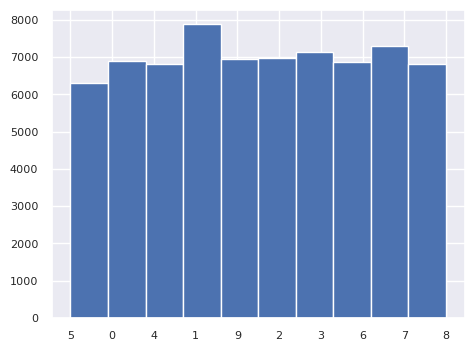

In [6]:
plt.hist(mnist.target);

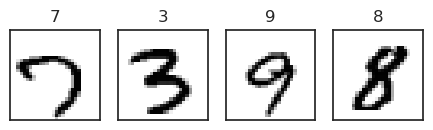

In [7]:
with sns.axes_style('white'):
    for i,idx in enumerate(np.random.randint(0,mnist.data.shape[0],4)):
        plt.subplot(1, 4, i+1)
        plt.imshow(mnist.data[idx].reshape(28,28), cmap=plt.cm.gray_r)
        plt.title(mnist.target[idx])
        plt.xticks([]) 
        plt.yticks([]) 

In [8]:
mnist.data = mnist.data / mnist.data.max()
mnist.target = mnist.target.astype('int')
print(f'{mnist.data.shape=} {mnist.target.shape=}')
print(f'{mnist.data.max()=} {mnist.data.min()=}')
print(f'{np.unique(mnist.target)=}')

mnist.data.shape=(70000, 784) mnist.target.shape=(70000,)
mnist.data.max()=1.0 mnist.data.min()=0.0
np.unique(mnist.target)=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%')

Accuracy: 92.0%


/opt/tljh/user/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def check_accuracy(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%')

check_accuracy(X_train, X_test, y_train, y_test)

Accuracy: 92.0%


### Fashion MNIST (Fashion Modified National Institute of Standards and Technology database)
<center><img src="img/Fashion-MNIST.webp" alt="Fashion MNIST" style="width: 60%;"/></center>

In [12]:
#!pip install kagglehub
import kagglehub
path = kagglehub.dataset_download("zalando-research/fashionmnist")
print(path)

/home/jupyter-mpenagaricano/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [13]:
train_df = pd.read_csv(path + '/fashion-mnist_train.csv')
test_df = pd.read_csv(path + '/fashion-mnist_test.csv')
print(train_df.shape , test_df.shape)
train_df.head()

(60000, 785) (10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_train = train_df.drop('label', axis=1).to_numpy()
y_train = train_df['label'].to_numpy()
X_test = test_df.drop('label', axis=1).to_numpy()
y_test = test_df['label'].to_numpy()
print(f'{X_train.shape=} {y_train.shape=}')
print(f'{X_test.shape=} {y_test.shape=}')
print(f'{X_train.max()=} {X_train.min()=}')
print(f'{X_test.max()=} {X_test.min()=}')
print(f'{np.unique(y_train)}')

X_train.shape=(60000, 784) y_train.shape=(60000,)
X_test.shape=(10000, 784) y_test.shape=(10000,)
X_train.max()=255 X_train.min()=0
X_test.max()=255 X_test.min()=0
[0 1 2 3 4 5 6 7 8 9]


<Axes: >

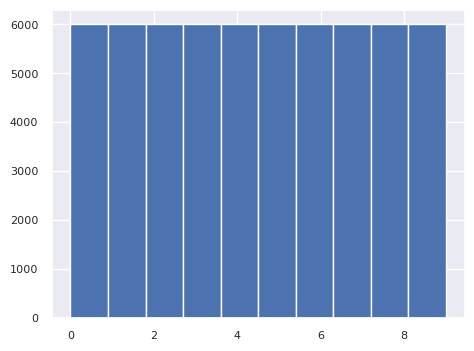

In [15]:
train_df['label'].hist()

<Axes: >

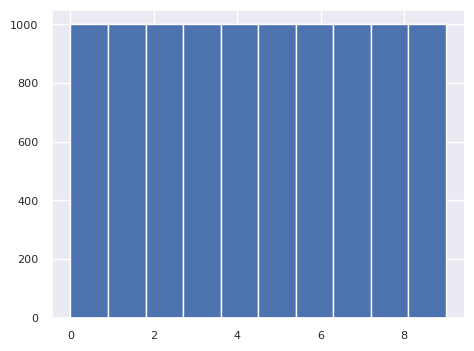

In [16]:
test_df['label'].hist()

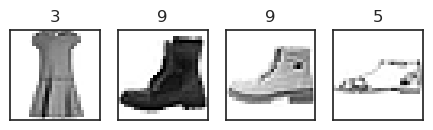

In [17]:
with sns.axes_style('white'):
    for i,idx in enumerate(np.random.randint(0,X_train.shape[0],4)):
        plt.subplot(1, 4, i+1)
        plt.imshow(X_train[idx].reshape(28,28), cmap=plt.cm.gray_r)
        plt.title(f'{y_train[idx]}')
        plt.xticks([]) 
        plt.yticks([]) 

In [18]:
X_train = train_df.drop('label', axis=1).to_numpy() / 255
y_train = train_df['label'].to_numpy()
X_test = test_df.drop('label', axis=1).to_numpy() /255
y_test = test_df['label'].to_numpy()
print(f'{X_train.shape=} {y_train.shape=}')
print(f'{X_test.shape=} {y_test.shape=}')
print(f'{X_train.max()=} {X_train.min()=}')
print(f'{X_test.max()=} {X_test.min()=}')
print(f'{np.unique(y_train)}')

X_train.shape=(60000, 784) y_train.shape=(60000,)
X_test.shape=(10000, 784) y_test.shape=(10000,)
X_train.max()=1.0 X_train.min()=0.0
X_test.max()=1.0 X_test.min()=0.0
[0 1 2 3 4 5 6 7 8 9]


In [19]:
check_accuracy(X_train, X_test, y_train, y_test)

Accuracy: 85.7%


In [20]:
from collections import namedtuple
TrainTestData = namedtuple('TrainTestData', 'X_train X_test y_train y_test')
fmnist = TrainTestData(X_train, X_test, y_train, y_test)
fmnist_mini = TrainTestData(X_train[:6000,:], X_test[:1000,:], y_train[:6000], y_test[:1000])

In [28]:
@ignore_warnings(category=ConvergenceWarning)
def check_accuracy(data):
    model = LogisticRegression()
    model.fit(data.X_train, data.y_train)
    y_pred = model.predict(data.X_test)
    print(f'Accuracy: {accuracy_score(data.y_test, y_pred)*100:.1f}%')

In [29]:
check_accuracy(fmnist)

Accuracy: 85.7%


In [30]:
check_accuracy(fmnist_mini)

Accuracy: 81.7%


## Naive Bayes Classifier

* Probabilistic model based on Bayes' theorem:
$$P(Y~|~X) = \frac{P(X~|~Y) \cdot P(Y)}{P(X)}$$
    * $P(Y~|~X)$: **posterior** probability (of class $Y$ given features $X$)
    * $P(X~|~Y)$: **likelihood** (of observing $X$ given class $Y$)
    * $P(Y)$: **prior probability** (of class $Y$)
    * $P(X)$: **marginal** probability (of features $X$)
* Classification problem:
$$\hat{y} = \underset{y}{\mathrm{argmax}} ~ P(Y|X) = \underset{y}{\mathrm{argmax}}  ~  P(X|Y) \cdot P(Y)$$
* **Naive** assumption: features within each class are conditionally independent
$$P(X=[x_{1},\dots,x_{n}]~|~Y) = \prod_{i=1}^{n}{P(x_{i}|Y)}$$

### Gaussian Naive Bayes Classifier

* The likelihood of the features is assumed to be Gaussian
* `GaussianNB(*, priors=None, var_smoothing=1e-09)`
    * `priors`: Use instead of train data priors
* Naive &rarr; independent features ; diagonal covariance
    * variance: `model.var_`

<center><img src="img/GaussianNB.png" alt="Gaussian Naive Bayes Classifier" style="width: 60%;"/></center>

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(fmnist_mini.X_train, fmnist_mini.y_train)
model.var_.shape

(10, 784)

In [78]:
from sklearn.naive_bayes import GaussianNB

def get_accuracy(data, model):
    y_pred = model.predict(data.X_test)
    return f'Accuracy: {accuracy_score(data.y_test, y_pred)*100:.1f}%'
    
@ignore_warnings(category=ConvergenceWarning)
def train_and_get_accuracy(data, model):
    model.fit(data.X_train, data.y_train)
    return get_accuracy(data, model)

In [81]:
train_and_get_accuracy(fmnist_mini, GaussianNB())

'Accuracy: 54.3%'

In [82]:
train_and_get_accuracy(fmnist_mini, LogisticRegression())

'Accuracy: 81.7%'

### Binary Logistic Regression Classifier

* Assumes a linear relationship between the input features $\mathbf{x}$ and the logit of the posterior probability $P(y=1 | \mathbf{x})$:
$$\text{logit}(P) = \ln\left(\frac{P}{1-P}\right) = \mathbf{w}^T \mathbf{x} + b$$
$$P(y=1 | \mathbf{x}; \mathbf{w}, b) = \sigma(\mathbf{w}^T \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^T \mathbf{x} + b)}}$$
* Loss function is Binary Cross-Entropy: $~ \text{-} \log P(y=y_{true} | \mathbf{x})$

### Multiclass Logistic Regression Classifier

* Assumes a linear relationship between the input features $\mathbf{x}$ and the *"logit vector"* of the posterior probabilities $P(y=j | \mathbf{x})$:
$$\text{logit}(\mathbf{P}) = \mathbf{W}^T \mathbf{x} + \mathbf{b}$$
$$P(y=j | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{e^{\mathbf{w}_j^T \mathbf{x} + b_j}}{\sum_{k=1}^{K} e^{\mathbf{w}_k^T \mathbf{x} + b_k}}$$
* Loss function is Categorical Cross-Entropy: $~ \text{-} \log P(y=y_{true} | \mathbf{x})$



* Scikit-learn's LogisticRegression supports binary and multiclass classification
* **Regularization**: add a penalty term to the cost function, reducing the *freedom* of the model.

`LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)`
* `solver: {'lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'}, default='lbfgs'` &rarr; optimization algorithm
* `max_iter: int, default=100` &rarr; maximum number of iterations
* `tol: float, default=1e-4` &rarr; tolerance for the stopping criteria
* `penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'` &rarr; norm used for regularization (penalize large weights)
* `C: float, default=1.0` &rarr; inverse of regularization strength
* `random_state: int, RandomState instance or None, default=None` &rarr; randomness of the algorithm


In [89]:
for solver in ['lbfgs', 'newton-cg']:
    for C in [0.01, 0.1, 1, 10, 100] :
        model = LogisticRegression(solver=solver, C=C, random_state=42)
        print(f'{solver=}\t{C=}\t{train_and_get_accuracy(fmnist_mini, model)}')

solver='lbfgs'	C=0.01	Accuracy: 81.1%
solver='lbfgs'	C=0.1	Accuracy: 83.4%
solver='lbfgs'	C=1	Accuracy: 81.7%
solver='lbfgs'	C=10	Accuracy: 80.9%
solver='lbfgs'	C=100	Accuracy: 81.0%
solver='newton-cg'	C=0.01	Accuracy: 81.6%
solver='newton-cg'	C=0.1	Accuracy: 83.3%
solver='newton-cg'	C=1	Accuracy: 82.9%
solver='newton-cg'	C=10	Accuracy: 81.5%
solver='newton-cg'	C=100	Accuracy: 80.6%


### Grid Search for hyperparameter tuning
* `GridSearchCV` does Grid Search <u>using cross-validation</u>

In [91]:
from sklearn.model_selection import GridSearchCV

@ignore_warnings(category=ConvergenceWarning)
def search_hyperparameters(data, model, param_grid, cv=5, verbose=0):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=cv,scoring='accuracy',verbose=verbose
    )
    grid_search.fit(fmnist_mini.X_train, fmnist_mini.y_train)
    return grid_search

params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'newton-cg']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(fmnist_mini, model, params, verbose=2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.4s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.3s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.3s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.3s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.3s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.2s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.3s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.3s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.2s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.3s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.3s
[CV] END ................................C=0.1, 

In [92]:
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

grid_search.best_params_ = {'C': 0.1, 'solver': 'newton-cg'}
grid_search.best_score_ = 0.8423333333333334


In [94]:
model = LogisticRegression(random_state=42, **grid_search.best_params_)
train_and_get_accuracy(fmnist_mini, model)

'Accuracy: 83.3%'